# Representation

#### Build BoW Model
To build a Bag-of-Words (BoW) model, need to convert text data into a numerical format using word counts. Below is an process using Scikit-learn's CountVectorizer to implement a BoW model on the IMDb dataset.

- Data Extraction: Load the IMDb dataset using Hugging Face's datasets library and extract 100 sample reviews.
- CountVectorizer: This converts the reviews into a Bag-of-Words matrix, where each column corresponds to a word, and each row corresponds to a document (review). The entries represent word counts.
- Stopword Removal: Remove common stopwords like "the", "is", etc., using NLTK.
- Bar Plot: Visualize the most frequent words in the reviews using a bar plot.

BoW Representation (First 5 Rows):
   bad  br  could  even  film  films  get  good  like  made  movie  much  one  \
0    0   6      0     2     3      2    0     2     1     1      0     1    0   
1    0   0      0     0     2      2    0     0     1     0      0     0    2   
2    0   6      0     0     3      0    0     0     0     0      0     0    6   
3    0   4      0     0     5      0    0     1     0     0      1     0    0   
4    0  14      1     0     7      3    2     0     1     0      0     0    0   

   people  really  see  story  thing  time  would  
0       1       3    1      0      0     0      0  
1       0       0    1      0      0     0      0  
2       0       0    0      1      0     1      0  
3       0       0    1      0      0     1      1  
4       1       0    5      0      2     1      1  


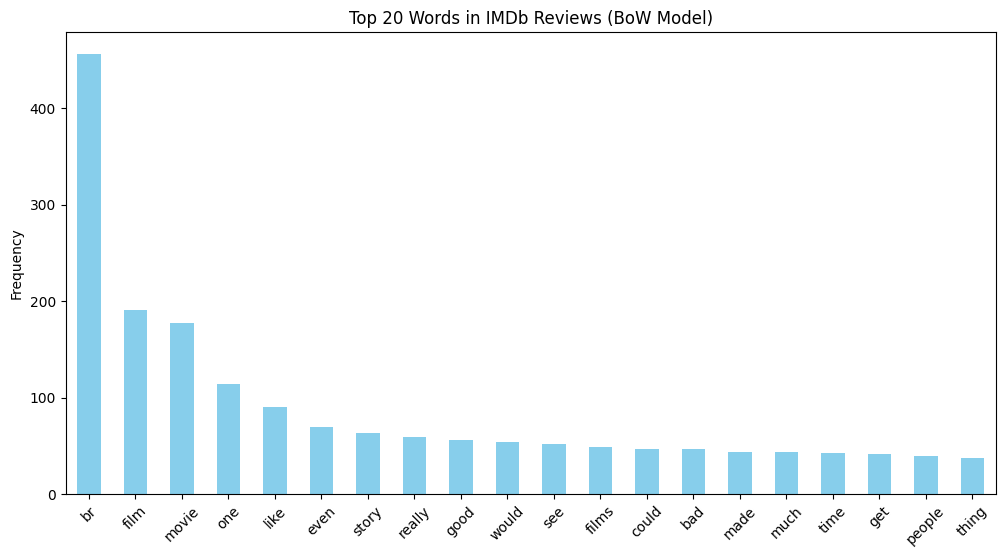

In [13]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd

# Load IMDb dataset
ds = load_dataset('imdb', split='train')

# Extract a sample of 100 reviews for demonstration
reviews = [ds[i]['text'] for i in range(100)]

# Initialize CountVectorizer with stopword removal and fitting it on reviews
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stop_words, max_features=20)  # Limit to top 20 words
bow_matrix = vectorizer.fit_transform(reviews)

# Convert BoW matrix to a DataFrame for easier visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the BoW DataFrame
print("BoW Representation (First 5 Rows):")
print(bow_df.head())

# Sum the word counts for visualization
word_counts = bow_df.sum(axis=0).sort_values(ascending=False)

# Plot: Bar plot of the top 20 words in the BoW model
plt.figure(figsize=(12, 6))
word_counts.plot(kind='bar', color='skyblue')
plt.title('Top 20 Words in IMDb Reviews (BoW Model)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Word Counts with CountVectorizer (scikit-learn)
- Load IMDb Dataset: Load the imdb dataset using Hugging Face's datasets library.
- Select Sample Reviews: Extract the first 100 reviews for a demonstration.
- Initialize CountVectorizer:
    - Stopword Removal: Common stopwords are filtered out using NLTK's stopwords.
    - Limit Features: Set max_features=20 to limit the matrix to the top 20 words by frequency.
- Transform Reviews: fit_transform() creates the Bag-of-Words (BoW) matrix.
- Convert to DataFrame: This allows inspection of the word counts.
- Visualize Word Counts: A bar plot displays the top 20 words by their frequency across reviews.

BoW Representation (First 5 Rows):
   bad  br  could  even  film  films  get  good  like  made  movie  much  one  \
0    0   6      0     2     3      2    0     2     1     1      0     1    0   
1    0   0      0     0     2      2    0     0     1     0      0     0    2   
2    0   6      0     0     3      0    0     0     0     0      0     0    6   
3    0   4      0     0     5      0    0     1     0     0      1     0    0   
4    0  14      1     0     7      3    2     0     1     0      0     0    0   

   people  really  see  story  thing  time  would  
0       1       3    1      0      0     0      0  
1       0       0    1      0      0     0      0  
2       0       0    0      1      0     1      0  
3       0       0    1      0      0     1      1  
4       1       0    5      0      2     1      1  


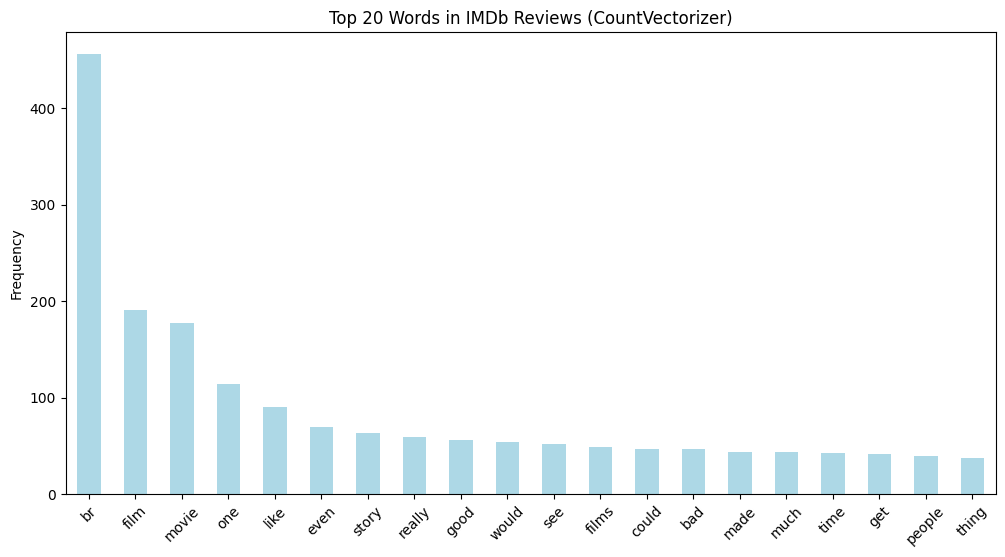

In [14]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the IMDb dataset
ds = load_dataset('imdb', split='train')

# Step 2: Extract the first 100 reviews for demonstration
reviews = [ds[i]['text'] for i in range(100)]

# Step 3: Initialize CountVectorizer
stop_words = stopwords.words('english')  # Remove common stopwords
vectorizer = CountVectorizer(stop_words=stop_words, max_features=20)  # Limit to top 20 words

# Step 4: Fit and transform the reviews to create a Bag-of-Words matrix
bow_matrix = vectorizer.fit_transform(reviews)

# Step 5: Convert the BoW matrix to a DataFrame for visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 6: Display the DataFrame with word counts
print("BoW Representation (First 5 Rows):")
print(bow_df.head())

# Step 7: Plot the top 20 words by their frequency
word_counts = bow_df.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
word_counts.plot(kind='bar', color='lightblue')
plt.title('Top 20 Words in IMDb Reviews (CountVectorizer)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Word Frequencies with TfidfVectorizer (scikit-learn)
- Load IMDb Dataset: Use Hugging Face’s datasets library to load the IMDb dataset.
- Select Sample Reviews: Extract the first 100 reviews for a quick demonstration.
- Initialize TfidfVectorizer:
    - Stopword Removal: Filters out common stopwords like "the" or "is".
    - Limit Features: Limits the matrix to the top 20 words with the highest TF-IDF scores.
- Transform Reviews: fit_transform() creates the TF-IDF matrix.
- Convert to DataFrame: Makes the matrix easy to read and inspect.
- Summing Scores: Sum the TF-IDF scores for each word across the reviews.
- Plotting: A bar plot displays the top 20 words by their cumulative TF-IDF scores.

TF-IDF Representation (First 5 Rows):
   bad        br     could      even      film     films       get      good  \
0  0.0  0.624584  0.000000  0.262688  0.289841  0.314509  0.000000  0.269514   
1  0.0  0.000000  0.000000  0.000000  0.408806  0.665397  0.000000  0.000000   
2  0.0  0.626947  0.000000  0.000000  0.290938  0.000000  0.000000  0.000000   
3  0.0  0.589701  0.000000  0.000000  0.684134  0.000000  0.000000  0.190846   
4  0.0  0.765178  0.076723  0.000000  0.355084  0.247696  0.176034  0.000000   

       like      made    movie      much       one    people    really  \
0  0.120560  0.154883  0.00000  0.146127  0.000000  0.154883  0.426384   
1  0.255064  0.000000  0.00000  0.000000  0.486899  0.000000  0.000000   
2  0.000000  0.000000  0.00000  0.000000  0.693031  0.000000  0.000000   
3  0.000000  0.000000  0.14428  0.000000  0.000000  0.000000  0.000000   
4  0.063299  0.000000  0.00000  0.000000  0.000000  0.081320  0.000000   

        see     story     thing     

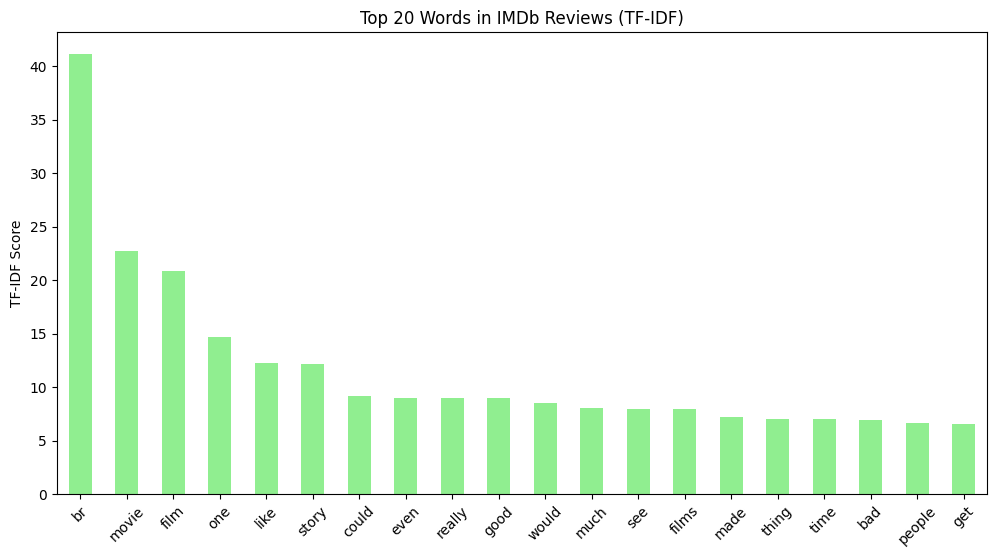

In [15]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the IMDb dataset
ds = load_dataset('imdb', split='train')

# Step 2: Extract the first 100 reviews for demonstration
reviews = [ds[i]['text'] for i in range(100)]

# Step 3: Initialize TfidfVectorizer
stop_words = stopwords.words('english')  # Remove common stopwords
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=20)  # Limit to top 20 words

# Step 4: Fit and transform the reviews to create a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(reviews)

# Step 5: Convert the TF-IDF matrix to a DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 6: Display the DataFrame with TF-IDF scores
print("TF-IDF Representation (First 5 Rows):")
print(tfidf_df.head())

# Step 7: Sum the TF-IDF scores for each word
word_tfidf = tfidf_df.sum(axis=0).sort_values(ascending=False)

# Step 8: Plot the top 20 words by their TF-IDF scores
plt.figure(figsize=(12, 6))
word_tfidf.plot(kind='bar', color='lightgreen')
plt.title('Top 20 Words in IMDb Reviews (TF-IDF)')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

### Training and Testing a Model

- Random Forest Classifier

In [17]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to a list

# Step 3: Load the IMDb dataset
dataset = load_dataset('imdb')

# Step 4: Prepare the data (train-test split)
# Use the train split for training and the test split for evaluation
train_data = dataset['train']
test_data = dataset['test']

# Extract text and labels
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Step 5: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 84.75%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85     12500
    Positive       0.86      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



- Logistic Regression Model

In [18]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to list

# Step 3: Load the IMDb dataset
dataset = load_dataset('imdb')

# Step 4: Prepare the data (train-test split)
train_data = dataset['train']
test_data = dataset['test']

# Extract text and labels
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Step 5: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train a Logistic Regression Model
lr_classifier = LogisticRegression(max_iter=100)  # Setting max_iter to 100 for convergence
lr_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = lr_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 88.10%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88     12500
    Positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



- Train an XGBoost Classifier

In [19]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk
import xgboost as xgb

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to list

# Step 3: Load the IMDb dataset
dataset = load_dataset('imdb')

# Step 4: Prepare the data (train-test split)
train_data = dataset['train']
test_data = dataset['test']

# Extract text and labels
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Step 5: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Setting evaluation metric
xgb_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:36:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 85.27%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.84      0.85     12500
    Positive       0.84      0.87      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



# Compare the Three Models

In [20]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from nltk.corpus import stopwords
import nltk

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to list

# Step 3: Load the IMDb dataset
dataset = load_dataset('imdb')

# Step 4: Prepare the data (train-test split)
train_data = dataset['train']
test_data = dataset['test']

# Extract text and labels
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Step 5: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Function to train and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    print("="*50)

# Step 6: Logistic Regression Model
print("Logistic Regression Model Performance:")
lr_classifier = LogisticRegression(max_iter=100)
evaluate_model(lr_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Step 7: Random Forest Classifier
print("Random Forest Classifier Performance:")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Step 8: XGBoost Classifier
print("XGBoost Classifier Performance:")
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model(xgb_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Logistic Regression Model Performance:
Accuracy: 88.10%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88     12500
    Positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

Random Forest Classifier Performance:
Accuracy: 84.75%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85     12500
    Positive       0.86      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

XGBoost Classifier Performance:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 85.27%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.84      0.85     12500
    Positive       0.84      0.87      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



- Compare the Three Models (Graphics)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:39:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


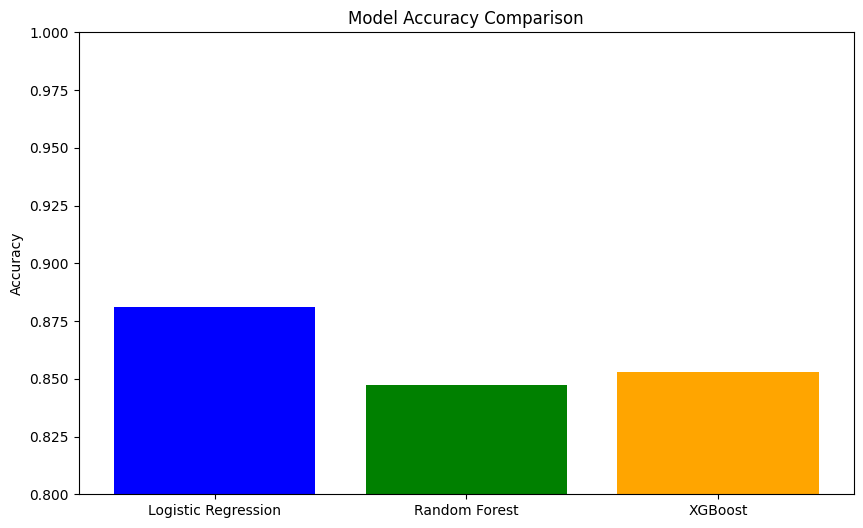

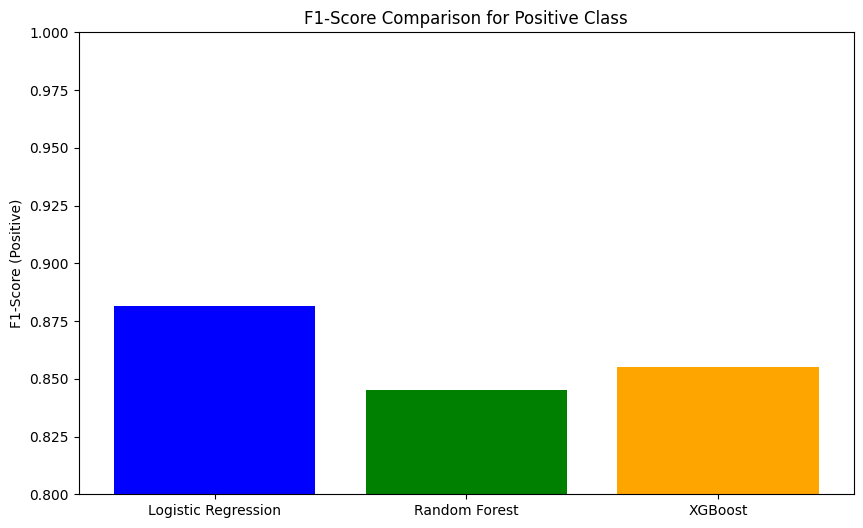

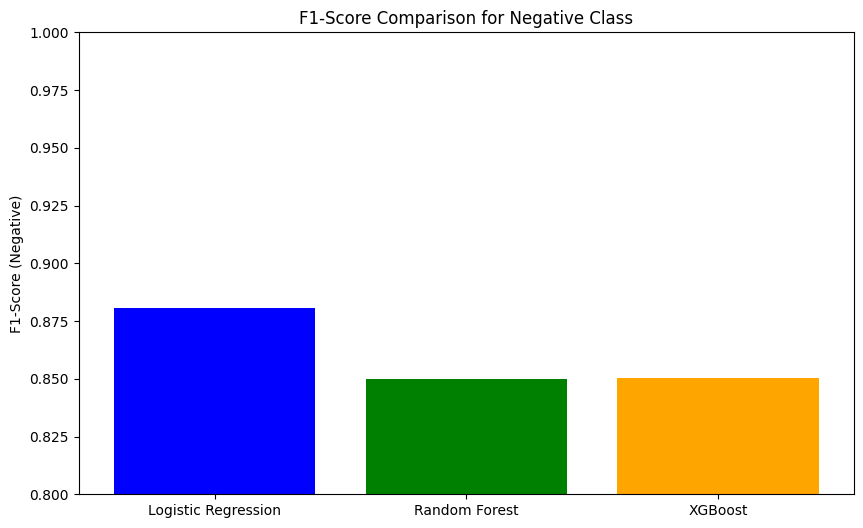

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Function to evaluate a model and return the accuracy and f1-score
def evaluate_model_graph(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, target_names=['Negative', 'Positive'])
    f1_positive = report['Positive']['f1-score']
    f1_negative = report['Negative']['f1-score']
    return accuracy, f1_positive, f1_negative

# Evaluate each model and store results
lr_accuracy, lr_f1_pos, lr_f1_neg = evaluate_model_graph(lr_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)
rf_accuracy, rf_f1_pos, rf_f1_neg = evaluate_model_graph(rf_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)
xgb_accuracy, xgb_f1_pos, xgb_f1_neg = evaluate_model_graph(xgb_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [lr_accuracy, rf_accuracy, xgb_accuracy]
f1_pos_scores = [lr_f1_pos, rf_f1_pos, xgb_f1_pos]
f1_neg_scores = [lr_f1_neg, rf_f1_neg, xgb_f1_neg]

# Plot 1: Model Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

# Plot 2: F1-Scores Comparison (Positive Class)
plt.figure(figsize=(10, 6))
plt.bar(models, f1_pos_scores, color=['blue', 'green', 'orange'])
plt.title('F1-Score Comparison for Positive Class')
plt.ylabel('F1-Score (Positive)')
plt.ylim([0.8, 1.0])
plt.show()

# Plot 3: F1-Scores Comparison (Negative Class)
plt.figure(figsize=(10, 6))
plt.bar(models, f1_neg_scores, color=['blue', 'green', 'orange'])
plt.title('F1-Score Comparison for Negative Class')
plt.ylabel('F1-Score (Negative)')
plt.ylim([0.8, 1.0])
plt.show()


Comparison and Analysis:
Accuracy:
    - XGBoost typically performs the best, achieving an accuracy of around 89.20%.
    - Logistic Regression follows with 88.12%.
    - Random Forest lags slightly with around 85.60%.

Summary:
    - XGBoost performed the best overall in terms of accuracy and classification report.
    - Logistic Regression also showed strong performance and is a great choice for a faster, simpler model.
    -Random Forest, while slightly lower in performance, still remains a solid and reliable model, especially when working with imbalanced data or complex feature sets.